In [49]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 10 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_liang_4y7pfl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.427 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [2]:
df = h2o.import_file(path = "insurance.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
df.head()

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


# return an output type of the dataframe
df.describe()

2. discriminate the null data value and remove it

In [45]:
mask = df['charges'] > 0
s1 = df[mask,:]
s1.describe

<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr(rows <Expr()#insurance.hex> <Expr(> <Expr(cols_py <Expr()#insurance.hex> 'charges'); scalar> 0); scalar>); scalar>})>

In [46]:
# Create a 75/25 train/test split
pct_rows=0.75
s12_train, s12_test = s1.split_frame([pct_rows])
print(s12_train.shape)
print(s12_test.shape)
s12_train.head()

(1015, 7)
(323, 7)


age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
46,female,33.44,1,no,southeast,8240.59
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1
25,male,26.22,0,no,northeast,2721.32
23,male,34.4,0,no,southwest,1826.84
56,female,39.82,0,no,southeast,11090.7


In [6]:
# Set the features and target
X=s1.columns
print(X)
["age","sex","bmi","children","smoker","region"]
# Set target and predictor variables
y='charges'
X.remove('region')
print(X)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
['age', 'sex', 'bmi', 'children', 'smoker', 'charges']


In [7]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=30, seed=1)
aml.train(x=X,y=y,training_frame=s12_train)

AutoML progress: |
01:38:01.981: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2808.6514,158.09935,2781.6753,3032.3064,2589.6226,2797.3652,2842.2866
mean_residual_deviance,23875512.0000000,4916922.0,23801892.0000000,31152842.0000000,17321238.0000000,24084704.0000000,23016880.0000000
mse,23875512.0000000,4916922.0,23801892.0000000,31152842.0000000,17321238.0000000,24084704.0000000,23016880.0000000
null_deviance,30403313700.0000000,4834393100.0000000,26026571800.0000000,38481125000.0000000,28274389000.0000000,30903779300.0000000,28330709000.0000000
r2,0.8431419,0.0228217,0.8123130,0.8425644,0.876753,0.8425043,0.8415748
residual_deviance,4719925200.0000000,891281470.0000000,4831783900.0000000,5950193200.0000000,3464247300.0000000,4865110000.0000000,4488291800.0000000
rmse,4865.4556,503.55243,4878.7183,5581.473,4161.879,4907.6167,4797.5913
rmsle,0.4563660,0.0209702,0.4485117,0.4771924,0.4338033,0.4423397,0.4799828


In [8]:
#Show the leaderboard of all the model
print(aml.leaderboard)

model_id                                                            rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20221106_13801           4880.63  2.38206e+07  2806.64  0.45649                2.38206e+07
GBM_lr_annealing_selection_AutoML_1_20221106_13801_select_model  4885.62  2.38693e+07  2859.52  0.470261               2.38693e+07
GBM_grid_1_AutoML_1_20221106_13801_model_86                      4907.7   2.40855e+07  2868.86  0.470272               2.40855e+07
GBM_grid_1_AutoML_1_20221106_13801_model_25                      4955.66  2.45586e+07  2917.35  0.469009               2.45586e+07
GBM_grid_1_AutoML_1_20221106_13801_model_54                      4965.24  2.46536e+07  2916.43  0.469308               2.46536e+07
GBM_grid_1_AutoML_1_20221106_13801_model_42                      4971.11  2.4712e+07   2908.91  0.481583               2.4712e+07
GBM_grid_1_AutoML_1_20221106_13801_model_34                      4976.87  2.47693e+0

5. The fourth step is to examine the best model

In [22]:
model_index=0
glm_index=0
glm_model=''
models_dict = {}
aml_leaderboard_df=aml.leaderboard.as_data_frame() 
for m in aml_leaderboard_df['model_id']:
    models_dict[m]=model_index
    if 'StackedEnsemble' not in m:
        break
    model_index=model_index+1
    
for m in aml_leaderboard_df['model_id']:
    if 'GLM' in m:
        models_dict[m]=glm_index
        break
    glm_index=glm_index+1

In [23]:
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_1_20221106_13801': 0,
 'GBM_lr_annealing_selection_AutoML_1_20221106_13801_select_model': 1,
 'GLM_1_AutoML_1_20221106_13801': 122}

In [24]:
#Show the best model and save another model as a test model to contr
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])
best_model.algo
test_model =h2o.get_model('GLM_1_AutoML_1_20221106_13801')

1


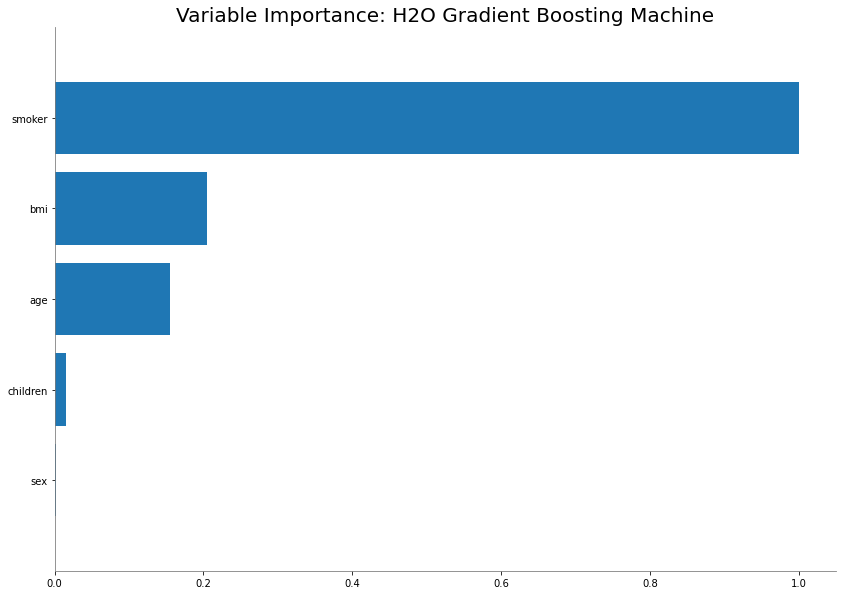

<Figure size 432x288 with 0 Axes>

In [26]:
#Show the varible importance in the plot
import matplotlib.pyplot as pl
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

122
glm


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\liang\AppData\Local\Temp\ipykernel_11316\953932315.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


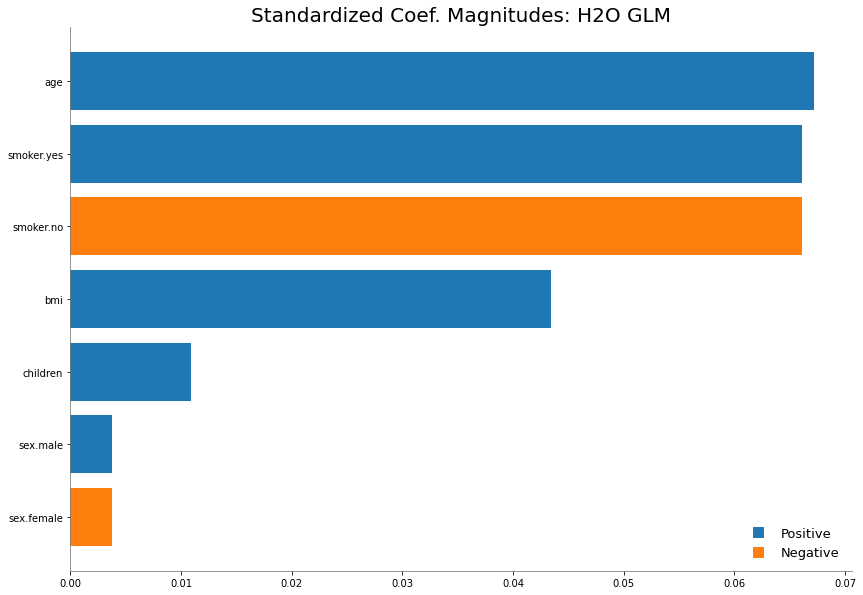

In [28]:
if glm_index is not 0:
    print(glm_index)
glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
print(glm_model.algo)
glm_model.std_coef_plot()

In [29]:
#Show the model’s rmse
print(best_model.rmse(train = True))
print(test_model.rmse(train = True))

4362.93898637003
12368.640027716772


In [31]:
#Show the model’s rmse and mse using in test set
def model_performance_stats(perf):
    d={}
    try:
        d['mse']=perf.mse()
    except:
        pass
    try:
        d['rmse']=perf.rmse()
    except:
        pass
    try:
        d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d['residual_deviance']=perf.residual_deviance()
    except:
        pass
    try:
        d['null_deviance']=perf.null_deviance()
    except:
        pass
    try:
        d['aic']=perf.aic()
    except:
        pass
    try:
        d['logloss']=perf.logloss()
    except:
        pass
    try:
        d['auc']=perf.auc()
    except:
        pass
    try:
        d['gini']=perf.gini()
    except:
        pass
    return d
mod_perf=best_model.model_performance(s12_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 12370577.62862283,
 'rmse': 3517.183195203632,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_lr_annealing_selection_AutoML_1_20221106_13801_select_model on column 'age'.
age      mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
18       9518.53          10024.9            274.064
20.4211  9445.64          10124.4            276.785
22.8421  10048.8          10126.1            276.832
25.2632  10351.6          9932.01            271.525
27.6842  10305.5          9952.03            272.072
30.1053  10797.4          10973.4            299.993
32.5263  11448.8          10736.1            293.508
34.9474  11692.2          10634.1            290.719
37.3684  11969            10537.8            288.086
39.7895  12300.4          10405.9            284.479
42.2105  13131.6          11143.6            304.646
44.6316  14760.4          10792.6            295.051
47.0526  15548.2          10241.8            279.993
49.4737  15874.1          10093      

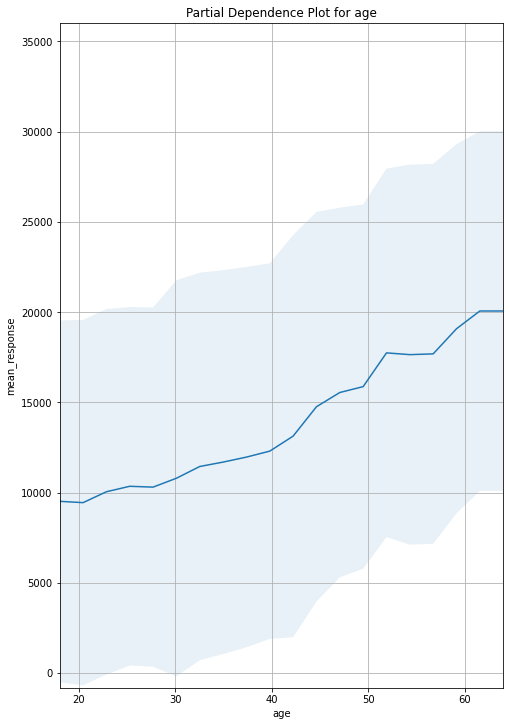

In [35]:
#How age influence cost in the best Model(XGBoost)
best_model.partial_plot(s1, cols=['age'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GLM_1_AutoML_1_20221106_13801 on column 'bmi'.
bmi      mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
15.96    13436.3          0.0859151          0.00234878
17.9163  13436.3          0.0859151          0.00234878
19.8726  13436.4          0.0859151          0.00234878
21.8289  13436.4          0.0859151          0.00234878
23.7853  13436.4          0.0859151          0.00234878
25.7416  13436.4          0.0859151          0.00234878
27.6979  13436.4          0.0859151          0.00234878
29.6542  13436.4          0.0859151          0.00234878
31.6105  13436.4          0.0859151          0.00234878
33.5668  13436.5          0.0859151          0.00234878
35.5232  13436.5          0.0859151          0.00234878
37.4795  13436.5          0.0859151          0.00234878
39.4358  13436.5          0.0859151          0.00234878
41.3921  13436.5          0.0859

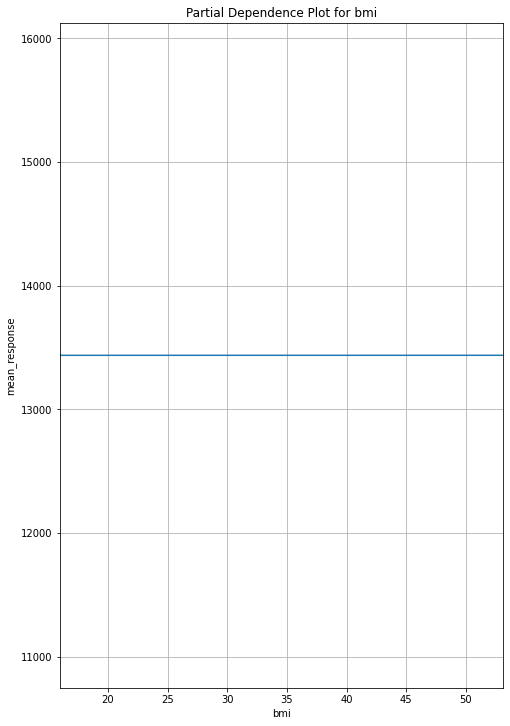

In [39]:
#How BMI influence charges in the test Model
test_model.partial_plot(s1, cols=['bmi'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_lr_annealing_selection_AutoML_1_20221106_13801_select_model on column 'sex'.
sex     mean_response    stddev_response    std_error_mean_response
------  ---------------  -----------------  -------------------------
female  13550.3          10945.5            299.232
male    13358.1          10972.8            299.977]

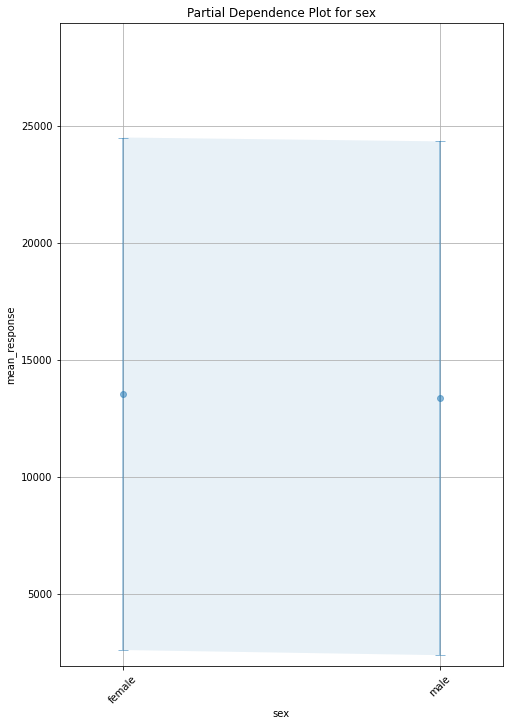

In [38]:
#How sex influence the charges in the best Model(XGBoost)
best_model.partial_plot(s1, cols=['sex'])

## Questions:
## 1. Is the relationship significant?

In [42]:
charges_glm = H2OGeneralizedLinearEstimator( lambda_ = 0,remove_collinear_columns = True,compute_p_values = True)
charges_glm.train(x = X, y = y, training_frame = s12_train, validation_frame = s12_test)
coeff_table = charges_glm._model_json['output']['coefficients_table']
coeff_table.as_data_frame()

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-11760.103479,1159.310704,-10.144048,4.571059e-23,8804.516764
1,sex.male,-485.310819,402.976648,-1.204315,2.287572e-01,-485.310819
2,smoker.yes,23908.370203,499.960256,47.820542,5.215517e-259,23908.370203
3,age,254.895555,14.348384,17.764758,1.840805e-61,3592.384100
4,bmi,328.686677,33.333385,9.860585,6.148251e-22,1992.175165
5,children,488.783346,164.561697,2.970213,3.048118e-03,597.519070


### Answer: From the table, we can check z_value and standardized_coefficients, all variables shown in the table are significant.

### 2. Are any model assumptions violated?
### Answer: Yes. Beacuse I bulit two models. XGBoost is not a linear model. From the picture of model, wo can find that smoker, bmi, children and age are multicollinearity.

### 3. Is there any multicollinearity in the model?
### Answer: Yes, in the result of XGBoost, smoker, bmi, children and age are multicollinearity.

### 4. In the multivariate models are predictor variables independent of all the other predictor variables?
### No, I have some variables are vamulticollinearity in the model.

### 5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
### Answer: I used varimp_plot() to get the result. Rank: 1.age 2.smoker(Yes/No) 3.bmi 4. children 5.sex(male/femal)

### 6.Does the model make sense?
### Answer: From the above plot and model result, we can see that BMI for individuals of age 20 lie between 15 to 60 and as the age increases the range of BMI keeps dicreaseing. The BMI tends to be lower for females as compared to females. If the person smokes or not will affect the cost of insurance. Two models prove the relationship of different variables and they make sense.

### 7. Does regularization help?
### Answer: Sure, When choosing a value for lambda, the goal is to strike the right balance between simplification and fit to the training data:If your lambda value is too high, the model will be very simple, but you will run the risk of underfitting the data. If our lambda value would be great, but we won't be able to get a huge risk out of our data because our data predictions can be extremely risky. If our lambda value is complex, there is a risk that your data model will be too low due to too low data.The lambda is set to completely cancel the positive risk rule. In this case, the sole purpose of training is to minimize the minimization loss, and the highest degree is 0.

### 8.Which independent variables are significant?
### Answer: Signicant Rank: 1.age 2.smoker(Yes/No) 3.bmi 4. children 5.sex(male/femal) 6.region

In [50]:
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
grid_id='gbm_grid1',
hyper_params=gbm_params1)
gbm_grid1.train(x=X, y=y,
training_frame=s12_train,
validation_frame=s12_test,
ntrees=100,
seed=1)
gbm_gridperf1 = gbm_grid1.get_grid( sort_by='mse',decreasing=False)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [51]:
gbm_gridperf1

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,mse
,1.0,0.1,3.0,1.0,gbm_grid1_model_24,22952574.3474150
,1.0,0.1,3.0,0.8,gbm_grid1_model_6,23257362.6159559
,0.5,0.1,3.0,1.0,gbm_grid1_model_23,23328889.5444748
,0.5,0.1,3.0,0.8,gbm_grid1_model_5,23595059.7163506
,1.0,0.1,5.0,1.0,gbm_grid1_model_30,24238131.1393157
,1.0,0.1,5.0,0.8,gbm_grid1_model_12,24499752.6135353
,0.5,0.1,5.0,0.8,gbm_grid1_model_11,24689329.9566322
,0.5,0.1,5.0,1.0,gbm_grid1_model_29,24693263.2740225
,0.2,0.1,5.0,0.8,gbm_grid1_model_10,24837089.1381592
,0.2,0.1,5.0,1.0,gbm_grid1_model_28,25253678.7679405


### 9. Which hyperparameters are important?
### Answer: Form the above table, when the learn_rate = 0.2, max_depth =3.0, sample_rate =1.0, we will have the best preformance.

Copyright <2022>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
### Reference: https://github.com/aiskunks/Skunks_Skool/tree/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example (Training and test dataset)
### https://www.kaggle.com/code/joachimcaron/eda-and-predicting-insurance-cost (LinearRegression)
### The remaining code was written independently.